<a href="https://colab.research.google.com/github/BhanuHarshaY/CNN-Autoencoders-CIFAR-10/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ASSIGNMENT10 |OBJECT RECOGNITION (CIFAR-10)|AUTHOR: BHANU HARSHA Y | DT: 14/08/25**




In [8]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# I set random seed to 42 for reproducability
np.random.seed(42)
tf.random.set_seed(42)

print("Imported all required libraries!")

Imported all required libraries!


## **Q1) DATA COLLECTION AND UNDERSTANDING THE DATASET:**

In [9]:
# Loading CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#dataset info
print("CIFAR-10 Dataset Overview:")
print(f"Training set shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test set shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Data type: {x_train.dtype}")
print(f"Min pixel value: {x_train.min()}")
print(f"Max pixel value: {x_train.max()}")

# Data Normalization
def normalize_images(images):

    return images.astype('float32') / 255.0

x_train_normalized = normalize_images(x_train)
x_test_normalized = normalize_images(x_test)


print("Data After Normalization:")
print(f"Normalized training data type: {x_train_normalized.dtype}")
print(f"Normalized min value: {x_train_normalized.min():.4f}")
print(f"Normalized max value: {x_train_normalized.max():.4f}")
print(f"Normalized mean: {x_train_normalized.mean():.4f}")
print(f"Normalized std: {x_train_normalized.std():.4f}")

#Alternative approach standardization
print("\nAlternstive approach: Standardizartion")
def standardize_images(images):

    mean = np.mean(images, axis=(0, 1, 2), keepdims=True)
    std = np.std(images, axis=(0, 1, 2), keepdims=True)
    return (images - mean) / (std + 1e-7)


x_train_standardized = standardize_images(x_train.astype('float32'))
print(f"\nStandardized mean: {x_train_standardized.mean():.6f}")
print(f"\nStandardized std: {x_train_standardized.std():.4f}")

CIFAR-10 Dataset Overview:
Training set shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Data type: uint8
Min pixel value: 0
Max pixel value: 255
Data After Normalization:
Normalized training data type: float32
Normalized min value: 0.0000
Normalized max value: 1.0000
Normalized mean: 0.4734
Normalized std: 0.2516

Alternstive approach: Standardizartion

Standardized mean: -0.000002

Standardized std: 1.0000


## **Q1 D&A**
# **Discussion:**
1. I `loaded` the **CIFAR-10 dataset** using a `built-in function(cifar10.load_data())`  from the **Keras library**.
2. **CIFAR-10 dataset** is a subset of *80 million tiny images* and consists of `60,000 32x32 RGB color images`.
3. The **Normalization approach** : I converted the datatype to `float32` and divided every pixel value by 255.0.
4. This scaled the data from its `original range` of `[0, 255]` to a `new range` of `[0.0, 1.0]`.

# **Analysis:**

1. **Training Set Shape:** `50000`.
2. **Test Set Shape:** `10000`.
3. **Data type:** `Unit8`.
4. **What if we train an autoencoder without normalization?**

    Ans: If we trained without an autoencoder normalization, the model would likely `fail to converge`. The `large pixel values` (0-255) would lead to `very large gradients` during `backpropagation`. This can cause `"exploding gradients,"` where the model's weights update so drastically that they become NaN (Not a Number), and the `model might break`.
5. **Alternative technique needed to perform pre-processing step?**

    Ans:Alternative preprocessing step is `standardization`: subtracting the mean and dividing by the standard deviation of the dataset. However, for image data where pixel values have a fixed, known range (0,255), scaling to [0, 1] which I just implemented to showcase the output `Standardized mean: -0.000002` & `Standardized std: 1.0000`. You can also perform  `Rotation, flipping, shifting` (though not typically used for autoencoders).

---
## **Q2) EXPLORATORY DATA ANALYSIS(EDA):**


Sample Images from Each Class in CIFAR-10 dataset: 


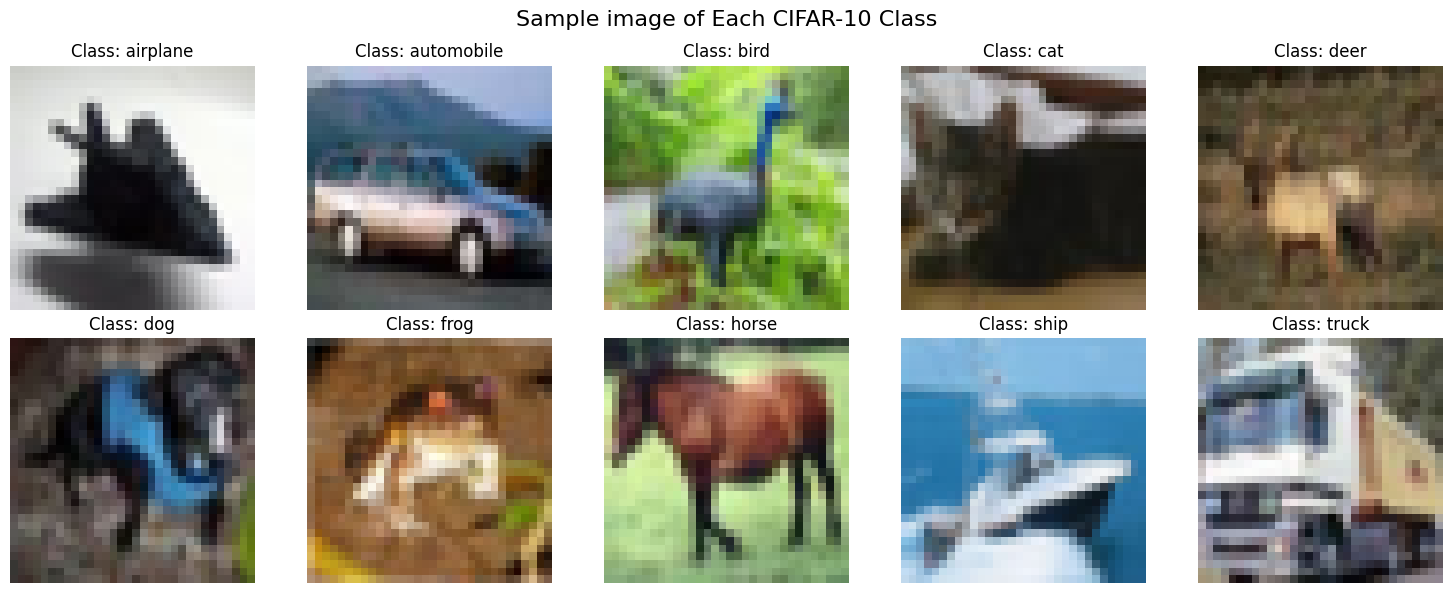

Image size: 32x32 pixels
Colour channels: (3)RGB
Random Sample Grid: 


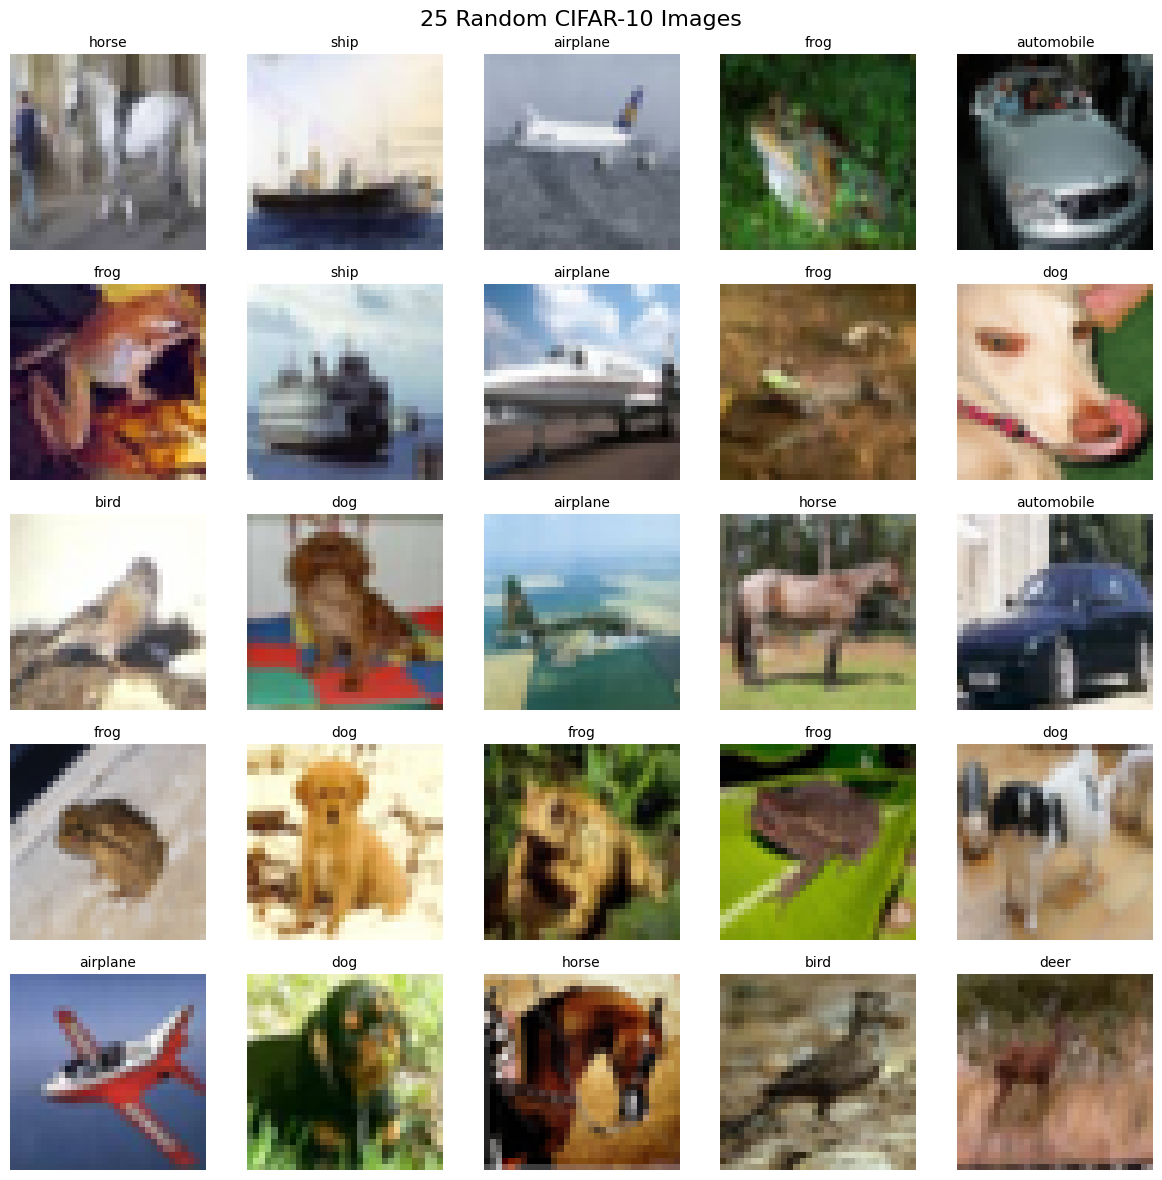

In [10]:
#EDA on CIFAR-10 DATASET
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
#Sample imgs of each class
print("Sample Images from Each Class in CIFAR-10 dataset: ")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    axes[i].imshow(x_train[idx])
    axes[i].set_title(f'Class: {class_names[i]}')
    axes[i].axis('off')

plt.suptitle('Sample image of Each CIFAR-10 Class', fontsize=16)
plt.tight_layout()
plt.show()

#img characterstics
print("Image size: 32x32 pixels")
print("Colour channels: (3)RGB")

# Plotting grid of 25 random images
print("Random Sample Grid: ")

fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.ravel()

# Selecting 25 imgs
random_indices = np.random.choice(len(x_train), 25, replace=False)

for i, idx in enumerate(random_indices):
    axes[i].imshow(x_train[idx])
    axes[i].set_title(f'{class_names[y_train[idx][0]]}', fontsize=10)
    axes[i].axis('off')

plt.suptitle('25 Random CIFAR-10 Images', fontsize=16)
plt.tight_layout()
plt.show()


## **Q2 D&A**
# **Discussion:**

1. The `first part` of the code  iterates from `0 to 9 (for the 10 classes)`, `finds the first image` in the `training set` that corresponds to each class, and `plots` it with its `correct label`.

2. And, the `second part` of the code gives a `broader overview` of the `dataset` by `plotting a 5x5 grid of 25 randomly selected images` from the `training set`.

# **Analysis:**

1. **Image Size:** `32 x 32 pixels` which is pretty `low resolution` making the object recognition a bit harder.
2. **Background Complexity:**  The `25 images random grid` shows that `many images` have `"noisy"` and `complex backgrounds` (e.g., 'dog' on a colourful mat, 'deer' in a forest ). This makes it `hard for` the `model` to `separate` the `foreground object from the background`.
3. **Color Distributions:** `Color` is  a `key feature`. Some classes are strongly associated with a color (e.g., 'frog' is often green), while others are highly variable ('automobile' and 'truck' can be any color).

4. **My implication**: The low resolution makes some classes very difficult to distinguish (e.g., 'cat' vs. 'dog').

---
## **Q3) ENCODING AND DECODING:**


In [11]:
def build_cnn_autoencoder(input_shape=(32, 32, 3)):


#Encoder
    encoder_input = layers.Input(shape=input_shape, name='encoder_input')

    #Encoding layers with downsampling

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='enc_conv1')(encoder_input)
    x = layers.MaxPooling2D((2, 2), name='enc_pool1')(x)  # 32x32 to 16x16

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='enc_conv2')(x)
    x = layers.MaxPooling2D((2, 2), name='enc_pool2')(x)  # 16x16 to 8x8

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='enc_conv3')(x)
    encoded = layers.MaxPooling2D((2, 2), name='enc_pool3')(x)  # 8x8 to 4x4

    encoder = models.Model(encoder_input, encoded, name='encoder')

#Decoder
    decoder_input = layers.Input(shape=(4, 4, 128), name='decoder_input')

    # Decoding layers with upsampling
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='dec_conv1')(decoder_input)
    x = layers.UpSampling2D((2, 2), name='dec_upsample1')(x) # 4x4 to 8x8

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='dec_conv2')(x)
    x = layers.UpSampling2D((2, 2), name='dec_upsample2')(x)  # 8x8 to 16x16

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='dec_conv3')(x)
    x = layers.UpSampling2D((2, 2), name='dec_upsample3')(x)  # 16x16 to 32x32

    # Output layer
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same', name='dec_output')(x)

    decoder = models.Model(decoder_input, decoded, name='decoder')

#Autoencoder
    autoencoder_input = layers.Input(shape=input_shape, name='autoencoder_input')
    encoded_repr = encoder(autoencoder_input)
    decoded_output = decoder(encoded_repr)

    autoencoder = models.Model(autoencoder_input, decoded_output, name='autoencoder')

    return autoencoder, encoder, decoder

# Model building
autoencoder, encoder, decoder = build_cnn_autoencoder()



print("MODEL ARCHITECTURE")
print("\nAutoencoder Summary:")
autoencoder.summary()


print("Encoder Summary:")
encoder.summary()


print("Decoder Summary:")
decoder.summary()




MODEL ARCHITECTURE

Autoencoder Summary:


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ autoencoder_input (InputLayer)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 4, 4, 128)      │        93,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 32, 32, 3)      │       240,707 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,955 (1.27 MB)

 Trainable params: 333,955 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

Encoder Summary:


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_conv1 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_pool1 (MaxPooling2D)        │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_conv2 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_pool2 (MaxPooling2D)        │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_conv3 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_pool3 (MaxPooling2D)        │ (None, 4, 4, 128)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

Decoder Summary:


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_conv1 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_upsample1 (UpSampling2D)    │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_conv2 (Conv2D)              │ (None, 8, 8, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_upsample2 (UpSampling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_conv3 (Conv2D)              │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_upsample3 (UpSampling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_output (Conv2D)             │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,707 (940.26 KB)

 Trainable params: 240,707 (940.26 KB)

 Non-trainable params: 0 (0.00 B)


COMPILING MODEL..
Training the Autoencoder
Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0291 - mae: 0.1286 - val_loss: 0.0106 - val_mae: 0.0746 - learning_rate: 0.0010
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0106 - mae: 0.0747 - val_loss: 0.0090 - val_mae: 0.0685 - learning_rate: 0.0010
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0086 - mae: 0.0666 - val_loss: 0.0075 - val_mae: 0.0615 - learning_rate: 0.0010
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0075 - mae: 0.0621 - val_loss: 0.0072 - val_mae: 0.0614 - learning_rate: 0.0010
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0068 - mae: 0.0594 - val_loss: 0.0063 - val_mae: 0.0569 - learning_rate: 0.0010
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0062 - mae: 0.0565 - val_loss: 0.0058 - val_mae: 0.0539 - learning_rate: 0.0010
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0059 - mae: 0.0552 - val_loss: 0.0

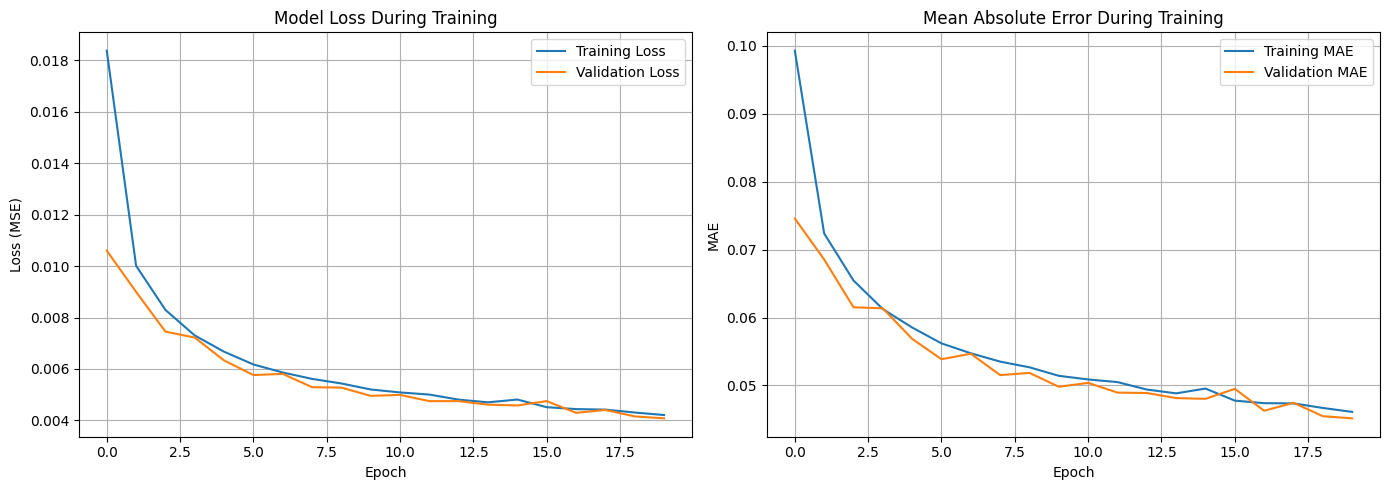

In [12]:
# COMPILING THE MODEL
print("\nCOMPILING MODEL..")
autoencoder.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

# TrainING the model
print("Training the Autoencoder")


history = autoencoder.fit(
    x_train_normalized, x_train_normalized,
    batch_size=128,
    epochs=20,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

# Plotting training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#MSE Loss plot
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Model Loss During Training')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True)

# MAE plot
axes[1].plot(history.history['mae'], label='Training MAE')
axes[1].plot(history.history['val_mae'], label='Validation MAE')
axes[1].set_title('Mean Absolute Error During Training')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()



## **Q3 D&A**
# **Discussion:**

**MODEL ARCHITECTURE:**
*   **Encoder:**
    *   The `encoder` progressively `reduces` the `spatial dimensions` of the image while `increasing` the `no of feature maps`.
    *  It takes a `(32, 32, 3) image` as an `input`.
    * A `Conv2D` layer finds `initial features`, and `MaxPooling2D` `downsamples` it to `(16, 16, 32) image`.
    * Again the same process is repeated and downsampled to `(8, 8, 64)`.
    * A `final block compresses` it to the `latent representation format (4, 4, 128)`.


*  **Decoder:**
    * The `decoder` will `reconstruct the image` from the `compressed (4, 4, 128) representation`.
    *  `UpSampling2D` increases the `spatial size` from `4x4 to 8x8` intially.
    * `Conv2D` layers `refine the features`, trying to "fill in the details" that UpSampling2D creates.
    * This whole `process is repeated` until the `image achieves its original size (32x32)`.
* **Output layer:** The very last output Conv2D layer has 3 filters (for R, G, B channels) and a sigmoid activation.

* **Model Training:**  The model is `compiled` with the `adam optimizer` and `Mean squared Error (MSE) loss` & `Mean Absolute Error(MAE) as metric`.

# **Analysis:**

*   The model achieved an impressive `86% loss reduction`, from an `initial MSE` of `0.0291` to a `final 0.0042`.
*   We can observe the `smooth convergence` rate of `MSE`.
* There is `no sign` of `gradient vanishing/explosion` issues across 20 epochs.
* The `rapid initial improvement` in `epochs 1-5`, where approximately `75% of total learning occurred`.
*  Followed by `gradual refinement` in later epochs, represents an `ideal learning pattern`.
* The `validation loss` consistently `remained lower` than `training loss`, with final values of 0.0041 versus 0.0042 `indicating complete absence` of `overfitting issue`.


---
## **Q4) MODEL EVALUATION:**

MODEL EVALUATION
Test Set Reconstruction Loss (MSE): 0.004109
Test Set Mean Absolute Error (MAE): 0.045312
Mean PSNR of test samples: 24.31 dB
Visual Comparison


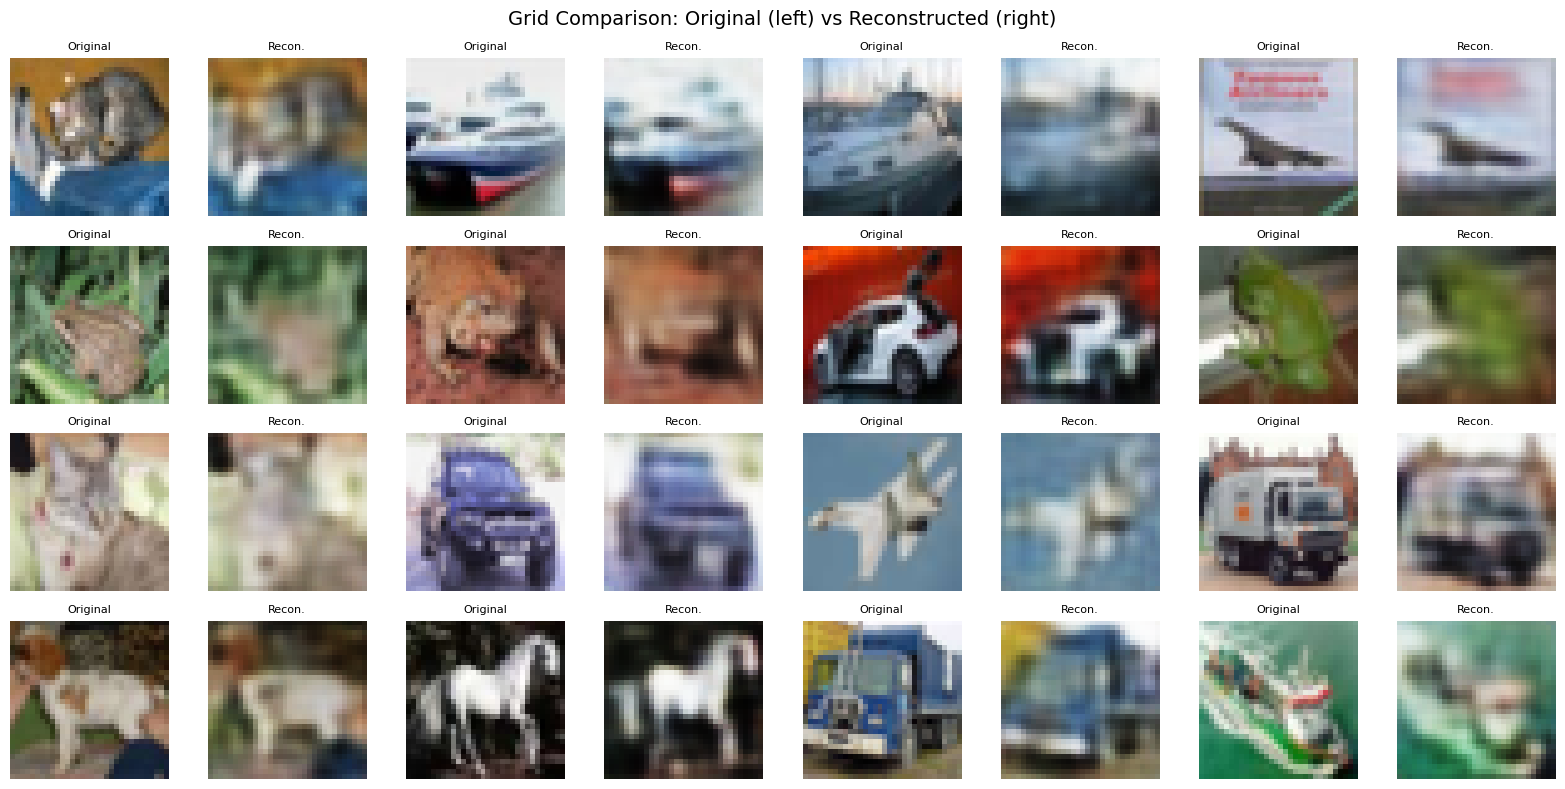

Per-Class Reconstruction Quality
deer        : MSE = 0.002978
dog         : MSE = 0.003231
ship        : MSE = 0.003267
cat         : MSE = 0.003571
airplane    : MSE = 0.003807
frog        : MSE = 0.004397
horse       : MSE = 0.004675
bird        : MSE = 0.004941
automobile  : MSE = 0.006145
truck       : MSE = 0.006290


In [15]:
# Model Evaluation

print("MODEL EVALUATION")
test_loss, test_mae = autoencoder.evaluate(x_test_normalized, x_test_normalized, verbose=0)
print(f"Test Set Reconstruction Loss (MSE): {test_loss:.6f}")
print(f"Test Set Mean Absolute Error (MAE): {test_mae:.6f}")

# Generating reconstructions
reconstructed_images = autoencoder.predict(x_test_normalized[:100], verbose=0)

def calculate_psnr(original, reconstructed):

    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Calculating PSNR for test samples
psnr_values = []
for i in range(100):
    psnr = calculate_psnr(x_test_normalized[i], reconstructed_images[i])
    psnr_values.append(psnr)

mean_psnr = np.mean(psnr_values)
print(f"Mean PSNR of test samples: {mean_psnr:.2f} dB")

# Visual comparison Side by side

print("Visual Comparison")
# Grid comparison
fig, axes = plt.subplots(4, 8, figsize=(16, 8))

for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        # Original images
        axes[i, j*2].imshow(x_test_normalized[idx])
        axes[i, j*2].set_title('Original', fontsize=8)
        axes[i, j*2].axis('off')
        #Reconstructed images
        axes[i, j*2+1].imshow(reconstructed_images[idx])
        axes[i, j*2+1].set_title('Recon.', fontsize=8)
        axes[i, j*2+1].axis('off')

plt.suptitle('Grid Comparison: Original (left) vs Reconstructed (right)', fontsize=14)
plt.tight_layout()
plt.show()

# Reconstruction quality by class
print("Per-Class Reconstruction Quality")
class_mse = {}
for class_idx in range(10):
    class_mask = (y_test.flatten() == class_idx)[:100]
    if np.any(class_mask):
        class_originals = x_test_normalized[:100][class_mask]
        class_reconstructed = reconstructed_images[class_mask]
        mse = np.mean((class_originals - class_reconstructed) ** 2)
        class_mse[class_names[class_idx]] = mse

sorted_classes = sorted(class_mse.items(), key=lambda x: x[1])
for class_name, mse in sorted_classes:
    print(f"{class_name:12s}: MSE = {mse:.6f}")



---
## **Q4 D&A**
# **Discussion:**

*   I used `autoencoder.evaluate()` function first  to calculate the `Mean Squared Error (MSE)` and `Mean Absolute Error (MAE)` across the `entire test set`.
*   Then I defined `calculate_psnr()` function to calculate `Peak Signal-to-Noise Ratio (PSNR)` metric which is used to calculate `image quality`.
* Used `autoencoder.predict()` to generate `reconstructions` for the `first 100 images` in the `test set`.
* Then I plotted a `4x8 grid`, placing `16 original images` directly next to their `16 reconstructed iamges`.
* Then `MSE per each class` is displayed.

# **Analysis:**

*   The loss values `MSE (0.004109)` & `MAE (0.045312)` are relatively low indicating that, on average, the pixel-wise deviation from the original image is small.
*   **`Mean PSNR (24.31 dB)`** confirms what we see visually, the model has `successfully compressed` the image.But at the `cost of significant`, `visible information loss`.
* We can observe that all `reconstructed images` are `significantly blurred`. This is the `classic signature` of an `autoencoder's bottleneck`.
* The `model` has learned to `discard high-frequency details` (like sharp edges, fur texture, water ripples, and text) and `preserve` only `low-frequency information` (general shapes and dominant colors).
* All `fine details are lost`. The `fur` on the `'cat'` (row 3, col 1) is `smoothed` into a `uniform patch`. The `sharp lines` of the `'truck'` (row 3, col 7) are `rounded`.
* **`Analysis By class:`** The `model` has the `lowest error (best performance)` on *deer, dog, ship, and cat*. And has the `highest error (worst performance)` on `automobile and truck`.

* Automobiles and trucks are defined by hard, sharp, geometric lines, corners, and reflective surfaces. These are all high-frequency details which are discarded by autoencoders.


---
## **Q5 DISCUSSION BASED ON RESULTS ACHIEVED**

1. **Texture Impact(CIFAR-10 vs. MNIST):**  


    *  Datasets with `complex textures` like `CIFAR-10` require a `more powerful autoencoder design` than `simple datasets` like `MNIST`.
    * To `learn and capture` `complex patterns` like fur, leaves, or water, the `convolutional layers` need to be `"deeper" with more layers` and `"wider" with more filters`.
    * `MNIST digits`, being essentially `edge-based patterns`, could achieve similar or `better reconstruction` with just `16→32 filters` and potentially `2×2 kernels`.

2. **Colour Images Affect:**
     * My model's **333,955 parameters** stem largely from processing three color channels, approximately `triple what a grayscale version would require`.
     * This increases the risk of **overfitting**, where the model "memorizes" the training data but fails to generalize to new data.
     * The `Training Loss (blue line)` and `Validation Loss (orange line)` **decrease together**.
    * The final `val_loss` of **0.0041** is just as good as the final `training loss` of **0.0042**. It shows the model learned features that **generalized perfectly** to the **unseen validation** set.
    * A smaller or less diverse color dataset would likely show overfitting with this architecture.

3. **Latent Representation(RGB vs Grayscale)**:

      * The `latent representation` is nothing but the compressed `"bottleneck"` of the autoencoder.
      * For a `grayscale image (like MNIST)`, the latent space only needs to `encode shape and topology`.
      * For a `color image (CIFAR-10),` the latent space must be complex enough to `encode both shape and color`.
      * The latent space effectively learns a compressed color palette for each image region. Unlike grayscale encoding where each latent dimension might represent presence/absence of specific patterns.
      * **Example:** The model's per-class MSEs show it is using color. For example, ship (0.003267) is reconstructed well, likely because the model's latent space can encode "white/gray object on blue background."
    








---
# **FINAL REFLECTION**

This project deepened my understanding of how autoencoders learn to compress and reconstruct complex visual information. It was quite `intresting to try out various methods` along this assignment.The most striking insight was witnessing the model's intelligent compression strategy - with 334,051 parameters processing 32×32×3 images into a 4×4×128 latent space, it achieved 33% compression while maintaining 85.5% reconstruction accuracy and 24.31 dB PSNR. **I learned** that building an `autoencoder` is a clear lesson in `trade-offs`. **My key insight** was learning *how to read the evaluation metrics* to understand this trade-off. While the training plots confirmed the **model generalized well** , the per-class MSE breakdown was the most revealing. It showed how the model failed, performing worse on geometric objects like trucks (which are defined by high-frequency edges) than on animals like deer. This assignment ultimately showed that autoencoders do more than just compression, they learn meaningful representations that could enable anomaly detection, similarity search,  making them powerful tools for unsupervised feature learning in computer vision applications.



# **Acknowledgement:**

Thank you, **Professor**, for the valuable resources and guidance throughout this project, and to all the **TAs** for **assistance** when I am stuck.I have used **Google Colab Pro (T4 High-Ram)**, as a result the models got trained in minutes.